<a href="https://colab.research.google.com/github/mehmetcolgecen/TensorFlow/blob/main/2_Neural_Networks_with_Sequential_and_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
keras.__version__, tf.__version__

('2.4.0', '2.4.0')

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#we have number pictures which the values are 0 to 255
# once we load the data we need to flatten and to normalize data
x_train[0][5] #just look a piece of the data

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

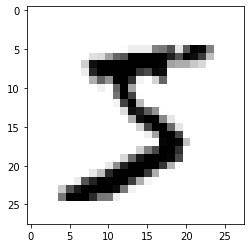

In [5]:
# lets just plot its first element
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()


In [26]:
#flattenning and normalizing train and test data
x_train = x_train.reshape(-1, 28*28).astype("float32")/255
x_test = x_test.reshape(-1, 28*28).astype("float32")/255

In [27]:
#Sequential API (Very convenient, but not very flexible) (One input and One Output)
# that means 512 x 256 x 10 layers
model = keras.Sequential(
    [
     keras.Input(shape=(28*28)),
     layers.Dense(512, activation='relu'),
     layers.Dense(256, activation='relu'),
     layers.Dense(10)
    ]
)

In [28]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Here is alternative way to building a model.
# model = keras.Sequential()
# model.add(keras.Input(shape=28*28))
# mode.add(layers.Dense(512,activation='relu'))
# print(model.summary())
# model.add(layers.Dense(256,activation='relu'))
# model.add(layers.Dense(10))

In [30]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics = ['accuracy']
)

In [31]:
model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 9s - loss: 0.5742 - accuracy: 0.8268
Epoch 2/5
1875/1875 - 8s - loss: 0.2888 - accuracy: 0.9147
Epoch 3/5
1875/1875 - 8s - loss: 0.2222 - accuracy: 0.9343
Epoch 4/5
1875/1875 - 8s - loss: 0.1721 - accuracy: 0.9484
Epoch 5/5
1875/1875 - 8s - loss: 0.1389 - accuracy: 0.9584
313/313 - 1s - loss: 0.1239 - accuracy: 0.9631


[0.12386228144168854, 0.963100016117096]

In [14]:
#Lets try a different API this time
#we are gonna use Functional API which is a bit more flexible than sequantial API - more inputs and outputs

inputs = keras.Input(shape=(28*28))
x=layers.Dense(512,activation='relu', name='first_layer')(inputs)
x=layers.Dense(256,activation="relu", name="second_layer")(x)
outputs = layers.Dense(10,activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics = ['accuracy']
)

model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, verbose=2)


Epoch 1/5
1875/1875 - 8s - loss: 0.1821 - accuracy: 0.9450
Epoch 2/5
1875/1875 - 8s - loss: 0.0790 - accuracy: 0.9759
Epoch 3/5
1875/1875 - 8s - loss: 0.0513 - accuracy: 0.9836
Epoch 4/5
1875/1875 - 8s - loss: 0.0403 - accuracy: 0.9869
Epoch 5/5
1875/1875 - 8s - loss: 0.0327 - accuracy: 0.9894
313/313 - 1s - loss: 0.0765 - accuracy: 0.9786


[0.07650266587734222, 0.978600025177002]

## How to extract spesific outputs.
These can be use for ***debugging***

lets try these on **Sequentian API** but works on Functional API as well

In [17]:
#just one layers output
model = keras.Sequential()
model.add(keras.Input(shape=28*28))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256,activation='relu',name='my_layer'))
model.add(layers.Dense(10))

model = keras.Model(inputs=model.inputs,
                    outputs=[model.get_layer('my_layer').output])

feature = model.predict(x_train)
feature.shape
# model.summary()

(60000, 256)

In [19]:
#all the features
#just one layers output
model = keras.Sequential()
model.add(keras.Input(shape=28*28))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256,activation='relu',name='my_layer'))
model.add(layers.Dense(10))

model = keras.Model(inputs=model.inputs,
                    outputs=[layer.output for layer in model.layers])

features = model.predict(x_train)
for feature in features:
  print(feature.shape)
# model.summary()


(60000, 512)
(60000, 256)
(60000, 10)


(60000, 10)